In [ ]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets


In [ ]:
n_pts = 500
x, y=datasets.make_circles(n_samples=n_pts, random_state=123, noise= 0.2, factor=0.3)

In [ ]:
x_data = torch.Tensor(x)
y_data = torch.Tensor(y.reshape(500,1))

In [ ]:
print(x_data.shape, y_data.shape) #batch dimesion , inputdimesion

torch.Size([500, 2]) torch.Size([500, 1])


classificaition problem
class가 2개 있음

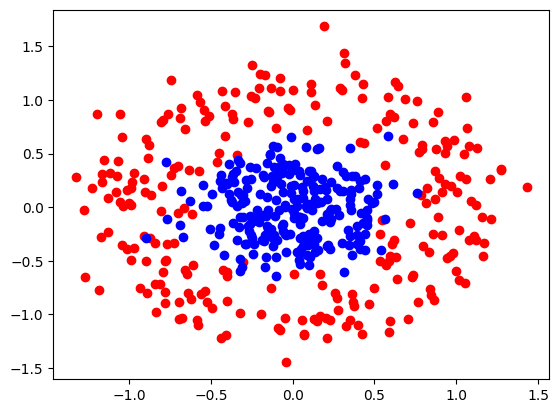

In [ ]:
def scatter_plot():
  plt.scatter(x[y==0, 0], x[y==0,1], color='red')
  plt.scatter(x[y==1,0], x[y==1,1], color='blue')

scatter_plot()

In [ ]:
class Model(nn.Module):
  def __init__ (self, input_size, H1, output_size):
    super().__init__()
    self.linear1 =nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)

  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    return x

  def predict(slef, x):
    return 1 if self.forward(x) >= 0.5 else 0





In [ ]:
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0337, -0.6131],
        [ 0.1547,  0.2682],
        [-0.3565, -0.0936],
        [ 0.0284, -0.5589]], requires_grad=True), Parameter containing:
tensor([-0.2609,  0.0011,  0.6428,  0.1013], requires_grad=True), Parameter containing:
tensor([[ 0.2083, -0.3305,  0.2074, -0.3892]], requires_grad=True), Parameter containing:
tensor([-0.1040], requires_grad=True)]


In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 1000
losses = []

for i in range(epochs):
  optimizer.zero_grad()
  y_pred = model.forward(x_data)
  loss= criterion(y_pred, y_data)

  print("epochs:", i,"loss:", loss.item())

  losses.append(loss.item())
  loss.backward()
  optimizer.step()

torch.Size([500, 1])
epochs: 0 loss: 0.7007879614830017
torch.Size([500, 1])
epochs: 1 loss: 0.698793351650238
torch.Size([500, 1])
epochs: 2 loss: 0.6970930099487305
torch.Size([500, 1])
epochs: 3 loss: 0.6956896781921387
torch.Size([500, 1])
epochs: 4 loss: 0.6945808529853821
torch.Size([500, 1])
epochs: 5 loss: 0.693757176399231
torch.Size([500, 1])
epochs: 6 loss: 0.6932004690170288
torch.Size([500, 1])
epochs: 7 loss: 0.6928824186325073
torch.Size([500, 1])
epochs: 8 loss: 0.69276362657547
torch.Size([500, 1])
epochs: 9 loss: 0.6927949786186218
torch.Size([500, 1])
epochs: 10 loss: 0.6929219961166382
torch.Size([500, 1])
epochs: 11 loss: 0.6930901408195496
torch.Size([500, 1])
epochs: 12 loss: 0.6932517290115356
torch.Size([500, 1])
epochs: 13 loss: 0.6933713555335999
torch.Size([500, 1])
epochs: 14 loss: 0.6934283971786499
torch.Size([500, 1])
epochs: 15 loss: 0.6934168338775635
torch.Size([500, 1])
epochs: 16 loss: 0.6933414340019226
torch.Size([500, 1])
epochs: 17 loss: 0.69321

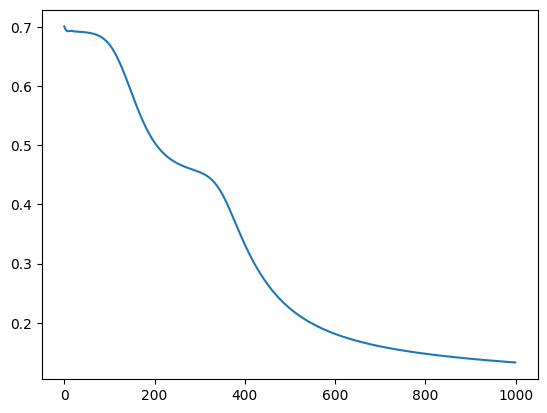

In [ ]:
plt.plot(range(epochs), losses)

In [ ]:
def plot_decision_boundary(x,y):
  #x축 y축 min max 값을 구해 그래프의 상하좌우 길이를 세팅한다.
  x_span = np.linspace(min(x[:,0]),max(x[:,0]))
  y_span = np.linspace(min(x[:,1]), max(x[:,1]))
  # 이 두개로 그리드를 만든다.
  xx, yy = np.meshgrid(x_span, y_span)
  #.rave()로 평탄화하고 이 둘을 합쳐 tensor로 변환한다.
  grid= torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  # 값 예측
  pred_func = model.forward(grid)

  #xx와 모양을 맞춰 그래프에 넣을 수 있게 세팅한다.
  #detach를 하여 autograd를 off한다.
  #numpy()로 변환하여 그래프를 그릴 수 있게 한다.
  z= pred_func.view(xx.shape).detach().numpy()
  #emdrhtjs
  plt.contourf(xx,yy,z)



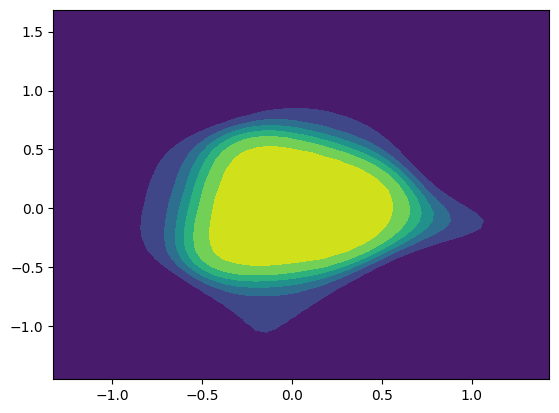

In [ ]:
plot_decision_boundary(x_data,y_data)

#  신경망 학습 MNIST

mnist는 손글씨의 숫자를 분류하는 문제를 위한 데이터입니다.
각 사진 데이터는 0~9의 데이터를 지니고 있습니다.



In [ ]:
import torch
import torch.nn as nn #linear. other operation(neural network)
import torch.nn.functional as F #various activation functions for model

#dataset / dataset augmentaition
import torchvision #YOU can load various Pretrainde Model from this package
import torchvision.datasets as vision_dsets
import torchvision.transforms as T # Transformation functions to manipulatie images

#optimizer
import torch.optim as optim #various optimization functions for model

#
from torch.autograd import Variable
from torch.utils import data


In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [ ]:
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title= "Confusion matrix"):
  accuracy=np.trace(cm) / float(np.sum(cm))
  misclass = 1-accuracy #error

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  if normalize:
    cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(20, 15))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  thresh= cm.max()/ 1.5 if normalize else cm.max()/2

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names)
    plt.yticks(tick_marks, target_names)

  if labels:
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
        plt.text(j,i,"{:0.4f}".format(cm[i,j]),
                 #horizintalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
      else:
        plt.text(j,i, "{:,}".format(cm[i,j]),
                #horizintalalignment="center",
                color='white' if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy,misclass))
  plt.show()



In [ ]:
def MNIST_DATA(root='./data',train=True, transforms=None, download=True, batch_size = 32, num_worker =1 ):
    print("[+]Ger the MNIST DATA")

    mnist_train = vision_dsets.MNIST(root= root, #저장한 위치에 저장한다는 뜻
                                     train = True, #train true면 train data false면 test data
                                     transform = T.ToTensor(), #tensor에서 읽기 쉽도록 데이터를 변환해줌
                                     download= True)
    mnist_test = vision_dsets.MNIST(root = root,
                                    train = False,
                                    transform = T.ToTensor(),
                                    download=True)
    """ batch size * data shape를 가지고 있어야 함."""

    trainDataLoader = data.DataLoader(dataset= mnist_train,
                                      batch_size= batch_size,
                                      shuffle = True,
                                      num_workers= num_worker)  #cpu의 활용개수 )

    testDataLoader = data.DataLoader(dataset= mnist_test,
                                      batch_size= batch_size,
                                      shuffle = False,
                                      num_workers= num_worker )

    print("[+] Finishe loading data & Preprocessing")
    return mnist_train,mnist_test,trainDataLoader,testDataLoader






In [ ]:
trainDset, testDsets, trainDataLoader,testDataLoader = MNIST_DATA(batch_size=32)

[+]Ger the MNIST DATA
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15989458.96it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 470448.15it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4369985.76it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8815607.94it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

[+] Finishe loading data & Preprocessing


In [ ]:
trainDset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
trainDset.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

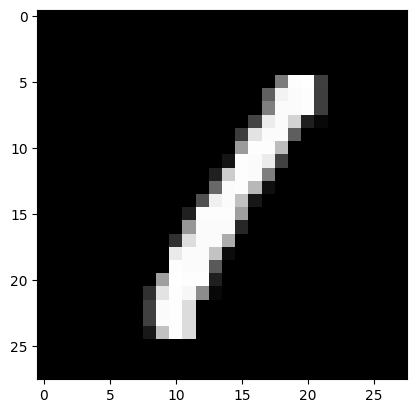

In [ ]:
plt.imshow(trainDset.data[3], cmap='gray')

# Define Trainer

Trainer를 class로 만든 것이다, 목적은 net, trainloader, testloader, optimizer, criterion을 모두 input으로 받아, Trainer 내에서 모델의 학습과 평가를 하기 위함이다.

In [ ]:
class Trainer():
  def __init__(self, trainloader, testloader, net, optimizer, criterion):
    self.trainloader =trainloader
    self.testloader = testloader
    self.net = net
    self.optimizer = optimizer
    self.criterion = criterion

  def train(self, epoch =1):
    self.net.train()
    for e in range(epoch):
      running_loss =0.0
      for i, data in enumerate(self.trainloader, 0):
        #get the inputs
        inputs, labels =data[0],data[1] # dataloader의 data를 가져오는 것인데 tuple[input_dat, labels]형태임
        inputs= inputs.cuda()
        labels = labels.cuda()
        #zero the parameter gradients
        self.optimizer.zero_grad()
        #Q1) way if we didn't clear up the gradients?

        #forward +  backward+optimize
        outputs= self.net(inputs)
        loss = self. criterion(outputs, labels)#compute model's score using the loss function
        loss.backward() #perform back-propagation from the loss
        self.optimizer.step()

        #print statistics
        running_loss += loss.item()
        if (i+1)% 500 ==0:
          print('[%d, %5d] loss: %.3f' % (e+1, i +1, running_loss/ 500))
          running_loss = 0.0

    print('Finished Training')

  def test(self):
      self.net.eval() #Q2) why should we change the network into eval-mode?

      test_loss=0
      correct =0
      for inputs, labels in self.testloader:
        inputs = inputs.cuda()
        labels = labels.cuda()
        output = self.net(inputs) #32 * 10
        pred = output.max(1, keepdim=True)[1] #get the index of the max #32
        correct += pred.eq(labels.view_as(pred)).sum().item() # 0~32

        test_loss /= len(self.testloader.dataset) #10,000
      print('\nTest set: Accuracy: {}/{} ({:.0f}%)\n'.format(correct, len(self.testloader.dataset),
              100.*correct / len(self.testloader.dataset)))


  def get_conf(self):
      self.net.eval()

      confusion = torch.zeros(10,10)
      for inputs, labels in self.testloader:
        inputs= inputs.cuda()
        labels= labels.cuda()
        output = self.net(inputs)
        pred = torch.argmax(output, dim=1)

        for num in range(output.shape[0]):
            confusion[pred[num],labels[num]] += 1

        return confusion

(1) 2 -LAyer Network + sigmoid
 - input:(28*28)
 - Hidden dimension:30
 - Output dimension: 10
 - activation: sigmoid
 -Optimizer: SGD
 -Loss:Cross-Entropy



In [ ]:
class MNIST_Net(nn.Module):
  def __init__(self):
    super(MNIST_Net, self).__init__()
    self.fc0 = nn.Linear(28*28,30)
    self.fc1= nn.Linear(30, 10)
    self.act= nn.Sigmoid()


  def forward(self, x):
    x= x.view(-1,28*28)
    x=self.fc0(x)
    x-self.act(x)
    x=self.fc1(x)
    return x


In [ ]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer= optim.SGD(mnist_net.parameters(), lr=0.001)

In [ ]:
trainer = Trainer(trainloader = trainDataLoader,
                  testloader = testDataLoader,
                  net = mnist_net,
                  criterion= criterion,
                  optimizer= optimizer)

In [ ]:
trainer. train(epoch =10)

[1,   500] loss: 2.212
[1,  1000] loss: 2.053
[1,  1500] loss: 1.892
[2,   500] loss: 1.589
[2,  1000] loss: 1.422
[2,  1500] loss: 1.270
[3,   500] loss: 1.056
[3,  1000] loss: 0.954
[3,  1500] loss: 0.890
[4,   500] loss: 0.786
[4,  1000] loss: 0.740
[4,  1500] loss: 0.708
[5,   500] loss: 0.652
[5,  1000] loss: 0.626
[5,  1500] loss: 0.611
[6,   500] loss: 0.576
[6,  1000] loss: 0.569
[6,  1500] loss: 0.547
[7,   500] loss: 0.529
[7,  1000] loss: 0.510
[7,  1500] loss: 0.510
[8,   500] loss: 0.488
[8,  1000] loss: 0.483
[8,  1500] loss: 0.477
[9,   500] loss: 0.460
[9,  1000] loss: 0.458
[9,  1500] loss: 0.453
[10,   500] loss: 0.434
[10,  1000] loss: 0.444
[10,  1500] loss: 0.433
Finished Training


In [ ]:
trainer.test()


Test set: Accuracy: 8890/10000 (89%)



<ipython-input-78-e5df3715edfb>:9: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]


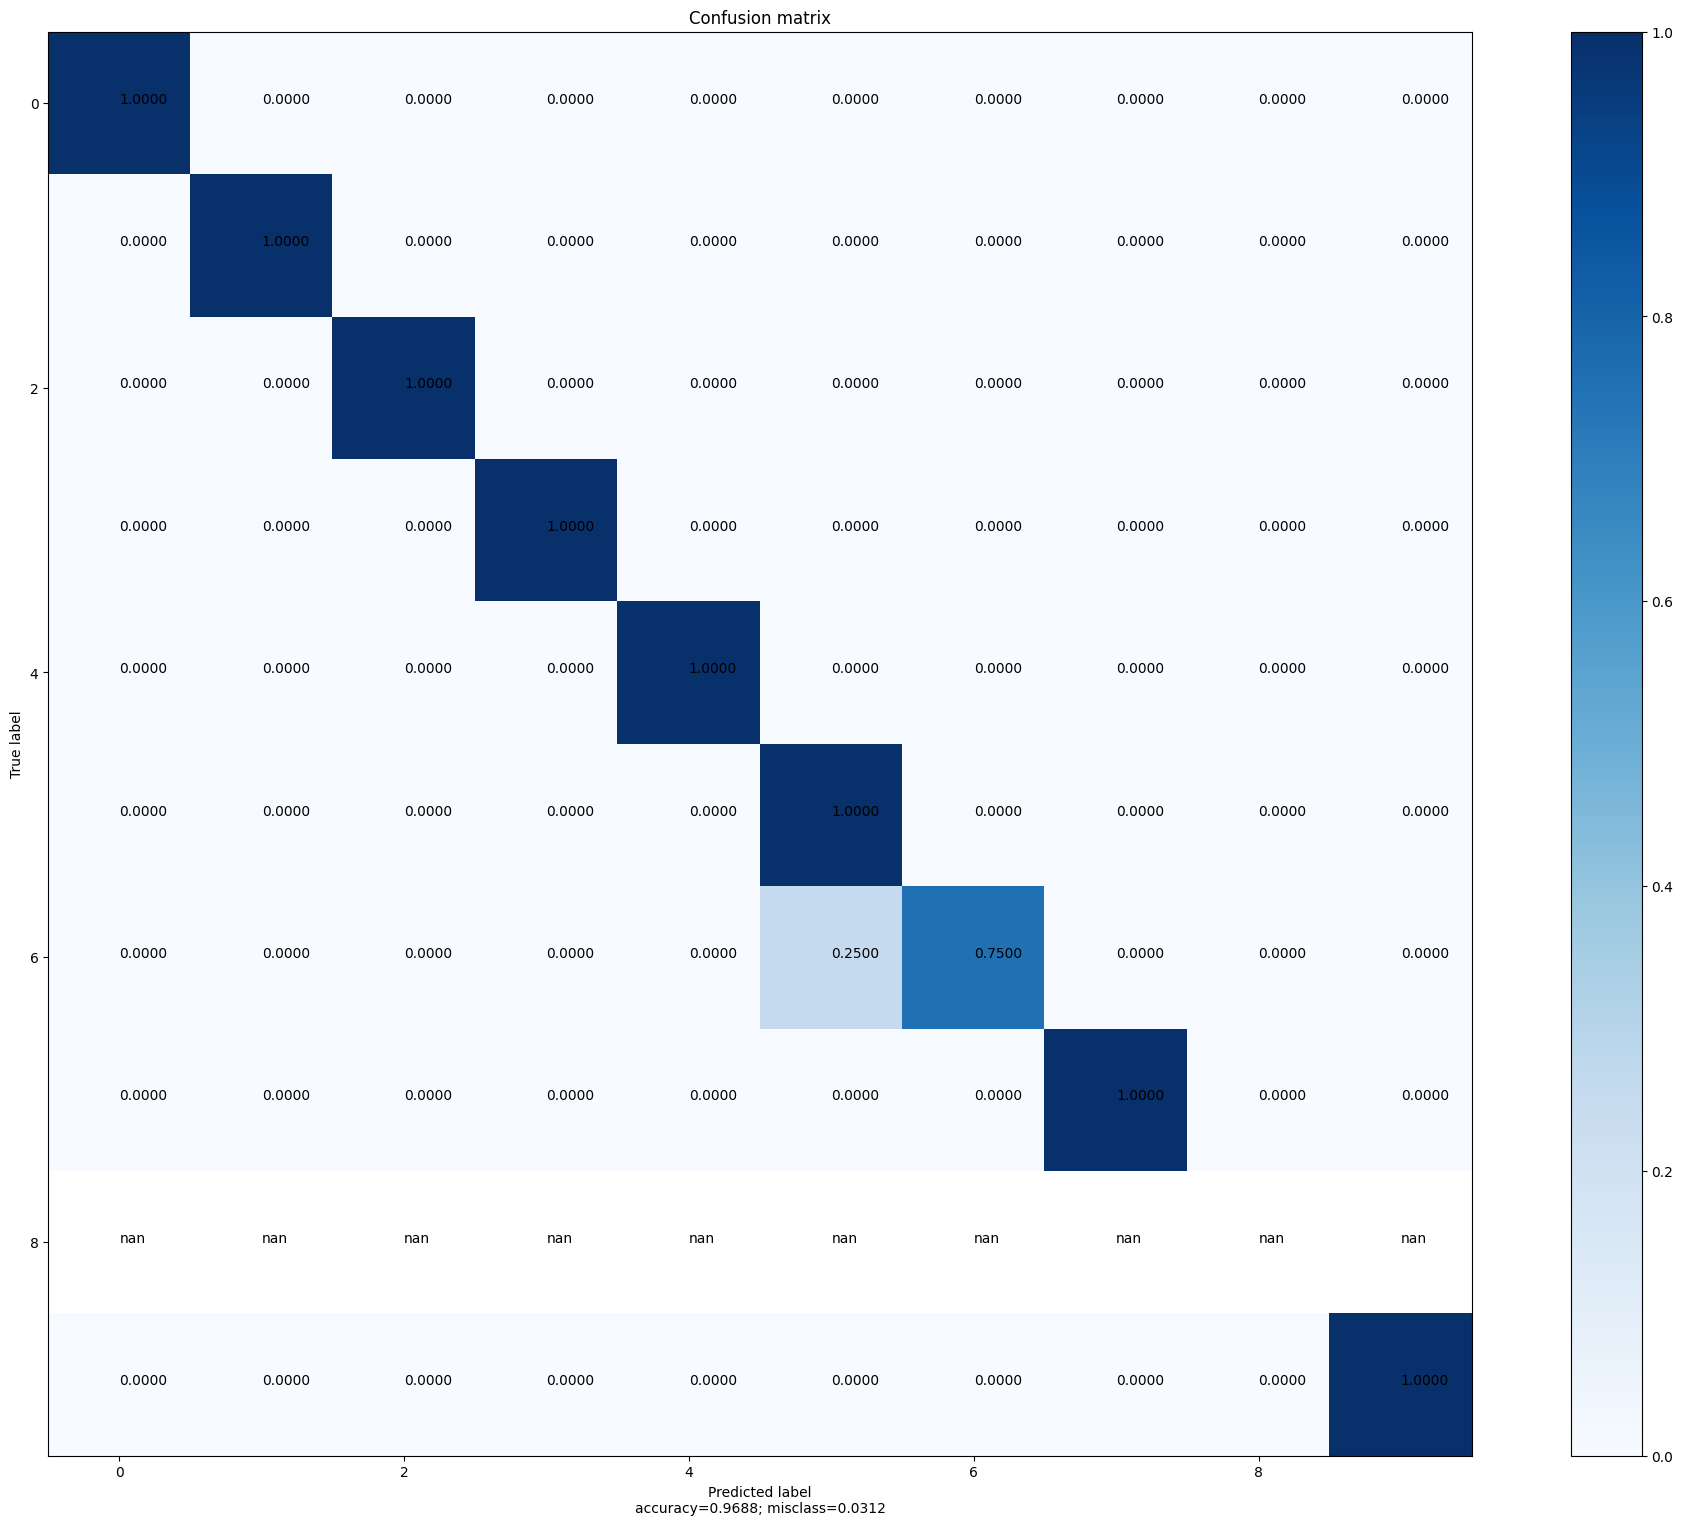

In [ ]:
plot_confusion_matrix(trainer.get_conf().numpy(), normalize=True)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(mnist_net)

23860

# 기본 신경망 학습 두번째
## CNN 구조를 통해서 학습

In [1]:
import torch
import torch.nn as nn #linear. other operation(neural network)
import torch.nn.functional as F #various activation functions for model

#dataset / dataset augmentaition
import torchvision #YOU can load various Pretrainde Model from this package
import torchvision.datasets as vision_dsets
import torchvision.transforms as T # Transformation functions to manipulatie images

#optimizer
import torch.optim as optim #various optimization functions for model

#
from torch.autograd import Variable
from torch.utils import data

In [2]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [3]:
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title= "Confusion matrix"):
  accuracy=np.trace(cm) / float(np.sum(cm))
  misclass = 1-accuracy #error

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  if normalize:
    cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(20, 15))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  thresh= cm.max()/ 1.5 if normalize else cm.max()/2

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names)
    plt.yticks(tick_marks, target_names)

  if labels:
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
        plt.text(j,i,"{:0.4f}".format(cm[i,j]),
                 #horizintalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
      else:
        plt.text(j,i, "{:,}".format(cm[i,j]),
                #horizintalalignment="center",
                color='white' if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy,misclass))
  plt.show()

In [4]:
def MNIST_DATA(root='./data',train=True, transforms=None, download=True, batch_size = 32, num_worker =1 ):
    print("[+]Ger the MNIST DATA")

    mnist_train = vision_dsets.MNIST(root= root, #저장한 위치에 저장한다는 뜻
                                     train = True, #train true면 train data false면 test data
                                     transform = T.ToTensor(), #tensor에서 읽기 쉽도록 데이터를 변환해줌
                                     download= True)
    mnist_test = vision_dsets.MNIST(root = root,
                                    train = False,
                                    transform = T.ToTensor(),
                                    download=True)
    """ batch size * data shape를 가지고 있어야 함."""

    trainDataLoader = data.DataLoader(dataset= mnist_train,
                                      batch_size= batch_size,
                                      shuffle = True,
                                      num_workers= num_worker)  #cpu의 활용개수 )

    testDataLoader = data.DataLoader(dataset= mnist_test,
                                      batch_size= batch_size,
                                      shuffle = False,
                                      num_workers= num_worker )

    print("[+] Finishe loading data & Preprocessing")
    return mnist_train,mnist_test,trainDataLoader,testDataLoader


In [8]:
trainDset, testDsets, trainDataLoader,testDataLoader = MNIST_DATA(batch_size=32)

[+]Ger the MNIST DATA
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4594360.67it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 133310.99it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 246731.72it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11232623.09it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

[+] Finishe loading data & Preprocessing


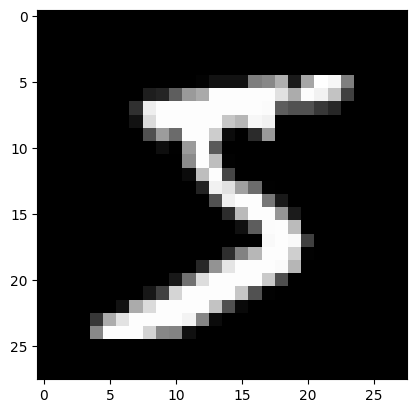

In [9]:
trainDset.data[0]
plt.imshow(trainDset.data[0], cmap='gray')

In [10]:
class Trainer():
  def __init__(self, trainloader, testloader, net, optimizer, criterion):
    self.trainloader =trainloader
    self.testloader = testloader
    self.net = net
    self.optimizer = optimizer
    self.criterion = criterion

  def train(self, epoch =1):
    self.net.train()
    for e in range(epoch):
      running_loss =0.0
      for i, data in enumerate(self.trainloader, 0):
        #get the inputs # batch X data shape # 32X 28X 28
        inputs, labels =data[0],data[1] # dataloader의 data를 가져오는 것인데 tuple[input_dat, labels]형태임
        inputs= inputs.cuda()
        labels = labels.cuda()
        #zero the parameter gradients
        self.optimizer.zero_grad()
        #Q1) way if we didn't clear up the gradients?

        #forward +  backward+optimize
        outputs= self.net(inputs)
        loss = self. criterion(outputs, labels)#compute model's score using the loss function
        loss.backward() #perform back-propagation from the loss
        self.optimizer.step()

        #print statistics
        running_loss += loss.item()
        if (i+1)% 500 ==0:
          print('[%d, %5d] loss: %.3f' % (e+1, i +1, running_loss/ 500))
          running_loss = 0.0

    print('Finished Training')

  def test(self):
      self.net.eval() #Q2) why should we change the network into eval-mode?

      test_loss=0
      correct =0
      for inputs, labels in self.testloader:
        inputs = inputs.cuda()
        labels = labels.cuda()
        output = self.net(inputs) #32 * 10
        pred = output.max(1, keepdim=True)[1] #get the index of the max #32
        correct += pred.eq(labels.view_as(pred)).sum().item() # 0~32

        test_loss /= len(self.testloader.dataset) #10,000
      print('\nTest set: Accuracy: {}/{} ({:.0f}%)\n'.format(correct, len(self.testloader.dataset),
              100.*correct / len(self.testloader.dataset)))


  def get_conf(self):
      self.net.eval()

      confusion = torch.zeros(10,10)
      for inputs, labels in self.testloader:
        inputs= inputs.cuda()
        labels= labels.cuda()
        output = self.net(inputs)
        pred = torch.argmax(output, dim=1)

        for num in range(output.shape[0]):
            confusion[pred[num],labels[num]] += 1

        return confusion

## Batch - normalization

### (1) 2-layer network + ReLU + Adam + Batch-Norm
 - input: 28*28
 - Hidden dimension:(30)
 - Output dimension: 10
 - activation: relu
 - normalization: batch-norm
 - Optimizer: Adam
 - Loss: Cross-Entropy



In [16]:
class MNIST_Net(nn.Module):
  def __init__(self):
    super(MNIST_Net, self).__init__()
    self.fc0 = nn.Linear(28*28,30)
    self.bn0 = nn.BatchNorm1d(30)
    # batchNorm1d가 뭘까요??
    self.fc1= nn.Linear(30, 10)
    self.act= nn.ReLU()

  def forward(self, x):
      x= x.view(-1,28*28) # 32 x 1 x 28 x 28 (4dim) -> 32 x (28*28) (2dim)
      x=self.fc0(x)
      x=self. bn0(x)
      x=self.act(x)
      x=self.fc1(x)
      return x

  #forward 함수는 계속 잘 만들고는 있는데, 한번도 사용하지는 않았습니다.
  #어디에서 사용하나요??

  #torch는 model(x) 와 model.forward(x)가 같습니다.

In [17]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(mnist_net.parameters(), lr=0.001)

In [18]:
trainer = Trainer(trainloader = trainDataLoader,
                  testloader = testDataLoader,
                  net = mnist_net,
                  criterion= criterion,
                  optimizer= optimizer)

In [19]:
trainer.train(epoch =1)

[1,   500] loss: 0.712
[1,  1000] loss: 0.338
[1,  1500] loss: 0.279
Finished Training


In [20]:
trainer.test()


Test set: Accuracy: 9406/10000 (94%)



In [21]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(mnist_net)

23920

# 2-Laer Network (Conv+ Fc) + ReLU + Adam + Batch-Norm
 - input:(28*28)
 - Conv: 8(6*6)filter with stride =2
 - hidden dimenstion: 8*12*12
 - output dimension: 10
 - activation: relu
 - normalization: batch-norm
 - Optimizer: Adam
 - Loss: Cross-Entropy



In [26]:
class MNIST_Net(nn.Module):
      def __init__(self):
        super(MNIST_Net, self).__init__()
        self.conv0 = nn.Conv2d(in_channels=1, out_channels=8,
                               kernel_size=6, stride=2) #layer1
        self.conv0_bn = nn.BatchNorm2d(8)   #2d batch-norm is used in 3d inputs
        self.fc = nn.Linear(8*12*12, 10)    #layer2
        self.act = nn.ReLU()

      def forward(self, x):
        x = self.conv0(x) #32 x 1 x 28 x 28
        x = self.conv0_bn(x) # 32 x 8 x 12 x 12
        x = self.act(x) # 32 X 8 X 12 X 12
        x = x.view(x.shape[0],-1) # 32 x (8*12*12) (2Dim)
        x = self.fc(x)
        return x

In [28]:
conv = nn.Conv2d(in_channels=1, out_channels=8,
                               kernel_size=6, stride=2)
bn = nn.BatchNorm2d(8)
input= torch.randn(32,1,28,28)

In [23]:
input.shape

torch.Size([32, 1, 28, 28])

In [31]:
bn(conv(input)).shape

torch.Size([32, 8, 12, 12])

In [27]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(mnist_net.parameters(), lr=0.001)

In [32]:
trainer = Trainer(trainloader = trainDataLoader,
                  testloader = testDataLoader,
                  net= mnist_net,
                  criterion = criterion,
                  optimizer= optimizer)



In [33]:
trainer.train(epoch=2)

[1,   500] loss: 0.402
[1,  1000] loss: 0.172
[1,  1500] loss: 0.135
[2,   500] loss: 0.091
[2,  1000] loss: 0.081
[2,  1500] loss: 0.084
Finished Training


In [34]:
trainer.test()


Test set: Accuracy: 9790/10000 (98%)



# 3-Laer Network (Conv+pool+ Fc) + ReLU + Adam + Batch-Norm
 - input:(28*28)
 - Conv: 8(6*6)filter with stride =2
 - hidden dimenstion: 8*12*12
 - output dimension: 10
 - activation: relu
 - normalization: batch-norm
 - Optimizer: Adam
 - Loss: Cross-Entropy


In [49]:
class MNIST_Net(nn.Module):
      def __init__(self):
        super(MNIST_Net, self).__init__()
        self.conv0 = nn.Conv2d(in_channels=1, out_channels=8,
                               kernel_size=6, stride=2) #layer1
        self.conv0_bn = nn.BatchNorm2d(8)   #2d batch-norm is used in 3d inputs
        self.pool= nn.MaxPool2d(2) #nn.AvgPool2d(2)
        self.fc = nn.Linear(8*6*6, 10)    #layer2
        self.act = nn.ReLU()

      def forward(self, x):
        x = self.conv0(x) #32 x 1 x 28 x 28
        x = self.conv0_bn(x) # 32 x 8 x 12 x 12
        x = self.act(x) # 32 X 8 X 12 X 12
        x = self.pool(x) # 32 X 8 X 6 X 6
        x = x.view(x.shape[0],-1) # 32 x (8*12*12) (2Dim)
        x = self.fc(x)
        return x

In [50]:
conv = nn.Conv2d(in_channels=1, out_channels=8,
                               kernel_size=6, stride=2)
bn = nn.BatchNorm2d(8)
pool= nn.MaxPool2d(2)
input= torch.randn(32,1,28,28)

In [40]:
pool(bn(conv(input))).shape

torch.Size([32, 8, 6, 6])

In [51]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(mnist_net.parameters(), lr=0.001)


In [52]:
trainer = Trainer(trainloader = trainDataLoader,
                  testloader = testDataLoader,
                  net= mnist_net,
                  criterion = criterion,
                  optimizer= optimizer)

In [53]:
trainer.train(epoch=2)

[1,   500] loss: 0.526
[1,  1000] loss: 0.191
[1,  1500] loss: 0.144
[2,   500] loss: 0.113
[2,  1000] loss: 0.104
[2,  1500] loss: 0.084
Finished Training


In [54]:
trainer.test()


Test set: Accuracy: 9772/10000 (98%)



In [56]:
count_parameters(mnist_net)

3202